# Install Skater

For detailed information on the dependencies and installation instructions check out [Installing Skater](https://datascienceinc.github.io/Skater/install.html).


```

    Option 1: without rule lists 
    pip install -U Skater
    
    Option 2: with rule lists
    1. conda install gxx_linux-64
    2. sudo pip install -U --no-deps --force-reinstall --install-option="--rl=True" skater
```

# Load Necessary Dependencies

In [1]:
import pandas as pd
import numpy as np
import model_evaluation_utils as meu
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load and view dataset

In [2]:
df = pd.read_csv('chronic_kidney_disease.csv', na_values=['', '?'])
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


# Check for missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null float64
bp       388 non-null float64
sg       353 non-null float64
al       354 non-null float64
su       351 non-null float64
rbc      248 non-null object
pc       335 non-null object
pcc      396 non-null object
ba       396 non-null object
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      329 non-null float64
wbcc     294 non-null float64
rbcc     269 non-null float64
htn      398 non-null object
dm       398 non-null object
cad      398 non-null object
appet    399 non-null object
pe       399 non-null object
ane      399 non-null object
class    400 non-null object
dtypes: float64(14), object(11)
memory usage: 78.2+ KB


## Understanding Dataset Features

This is a chronic kidney dataset available on the UC Irvine ML Repository:- https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

This dataset is actually real data collected from Apollo Hospitals, for a period of nearly 2 months.

Data has various report metrics of patients suffering from Chronic Kidney Disease (ckd) or not suffering (notckd)

Objective is to build a model to predict this accurately based on past data


```
Dataset Feature Descriptions
-----------------------------
age        -	age                     : Age(numerical)  - age in years
bp	     -	blood pressure          : Blood Pressure(numerical) - bp in mm/Hg
sg	     -	specific gravity        : Specific Gravity(nominal) - sg - (1.005,1.010,1.015,1.020,1.025) 
al	     -    albumin                 : Albumin(nominal) - al - (0,1,2,3,4,5) 
su	     -	sugar                   : Sugar(nominal) - su - (0,1,2,3,4,5) 
rbc	    -	red blood cells         : Red Blood Cells(nominal) - rbc - (normal,abnormal) 
pc	     -	pus cell                : Pus Cell (nominal) - pc - (normal,abnormal) 
pcc	    -	pus cell clumps         : Pus Cell clumps(nominal) - pcc - (present,notpresent) 
ba	     -	bacteria                : Bacteria(nominal) - ba - (present,notpresent) 
bgr	    -	blood glucose random    : Blood Glucose Random(numerical)	- bgr in mgs/dl 
bu	     -	blood urea              : Blood Urea(numerical) - bu in mgs/dl 
sc	     -	serum creatinine        : Serum Creatinine(numerical) - sc in mgs/dl 
sod	    -	sodium                  : Sodium(numerical) - sod in mEq/L 
pot	    -	potassium               : Potassium(numerical) - pot in mEq/L 
hemo	   -	hemoglobin              : Hemoglobin(numerical) - hemo in gms 
pcv	    -	packed cell volume      : Packed Cell Volume(numerical)  
wbcc       -	white blood cell count  : White Blood Cell Count(numerical) - wbcc in cells/cumm 
rbcc       -	red blood cell count    : Red Blood Cell Count(numerical)	- rc in millions/cmm 
htn	    -	hypertension            : Hypertension(nominal) - htn - (yes,no) 
dm	     -	diabetes mellitus       : Diabetes Mellitus(nominal) - dm - (yes,no) 
cad	    -	coronary artery disease : Coronary Artery Disease(nominal) - cad - (yes,no) 
appet	  -	appetite                : Appetite(nominal) - appet - (good,poor) 
pe	     -	pedal edema             : Pedal Edema(nominal) - pe - (yes,no)	
ane	    -	anemia                  : Anemia(nominal) - ane - (yes,no) 
class	  -	class                   : Class (nominal) - class - (ckd,notckd)
```

# Separating feature columns based on type

In [4]:
numeric_cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
categorical_cols = list(set(df.columns) - set(numeric_cols))

print('Numeric Cols:', numeric_cols)
print('Categorical Cols:', categorical_cols)

Numeric Cols: ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
Categorical Cols: ['pcc', 'ane', 'sg', 'rbc', 'pc', 'cad', 'su', 'appet', 'class', 'dm', 'ba', 'al', 'htn', 'pe']


In [5]:
df['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

# Handling Missing Values


To handle missing data we will use what we learnt from data wrangling in L1 - Training

- For categorical data (discrete) - Fill missing values with mode
- For numeric data (continuous)   - Fill missing values with median


# Missing values in categorical data

For categorical variables we will fill missing values by the mode (most frequently occuring value) per category - ckd\nonckd

## Get mode for each dataset feature based on the two prediction class categories

In [6]:
cat_missing_filler = df[categorical_cols].groupby('class').apply(lambda x: x.mode()).reset_index(drop=True).to_dict()
cat_missing_filler = {
    key: {cat_missing_filler['class'][sub_key]: sub_value 
              for sub_key, sub_value in value.items()}
    for key, value in cat_missing_filler.items()
    
}

cat_missing_filler

{'al': {'ckd': 0.0, 'notckd': 0.0},
 'ane': {'ckd': 'no', 'notckd': 'no'},
 'appet': {'ckd': 'good', 'notckd': 'good'},
 'ba': {'ckd': 'notpresent', 'notckd': 'notpresent'},
 'cad': {'ckd': 'no', 'notckd': 'no'},
 'class': {'ckd': 'ckd', 'notckd': 'notckd'},
 'dm': {'ckd': 'yes', 'notckd': 'no'},
 'htn': {'ckd': 'yes', 'notckd': 'no'},
 'pc': {'ckd': 'normal', 'notckd': 'normal'},
 'pcc': {'ckd': 'notpresent', 'notckd': 'notpresent'},
 'pe': {'ckd': 'no', 'notckd': 'no'},
 'rbc': {'ckd': 'normal', 'notckd': 'normal'},
 'sg': {'ckd': 1.01, 'notckd': 1.02},
 'su': {'ckd': 0.0, 'notckd': 0.0}}

## Fill missing values in each categorical column with prediction class based mode

In [7]:
for col in categorical_cols:
    df[col] = df.apply(lambda row: cat_missing_filler[col][row['class']] 
                           if (pd.isnull(row[col]))
                                 else row[col], axis=1)
    df[col] = df[col].astype('category')

# Missing values in numeric data

For numeric variables we will fill missing values by the median (Q2: 50%ile) per category - ckd\nonckd

## Get median for each dataset feature based on the two prediction class categories

In [8]:
num_missing_filler = df.groupby('class').apply(lambda x: x.median()).reset_index()[numeric_cols+['class']].to_dict()
num_missing_filler = {
    key: {num_missing_filler['class'][sub_key]: sub_value 
              for sub_key, sub_value in value.items()}
    for key, value in num_missing_filler.items()
    
}
num_missing_filler

{'age': {'ckd': 59.0, 'notckd': 46.0},
 'bgr': {'ckd': 143.5, 'notckd': 107.5},
 'bp': {'ckd': 80.0, 'notckd': 70.0},
 'bu': {'ckd': 53.0, 'notckd': 33.0},
 'class': {'ckd': 'ckd', 'notckd': 'notckd'},
 'hemo': {'ckd': 10.9, 'notckd': 15.0},
 'pcv': {'ckd': 33.0, 'notckd': 46.0},
 'pot': {'ckd': 4.2999999999999998, 'notckd': 4.5},
 'rbcc': {'ckd': 3.8999999999999999, 'notckd': 5.2999999999999998},
 'sc': {'ckd': 2.25, 'notckd': 0.90000000000000002},
 'sod': {'ckd': 136.0, 'notckd': 141.0},
 'wbcc': {'ckd': 8800.0, 'notckd': 7500.0}}

## Fill missing values in each numeric column with prediction class based median

In [9]:
for col in numeric_cols:
    df[col] = df.apply(lambda row: num_missing_filler[col][row['class']] 
                           if (pd.isnull(row[col]))
                                 else row[col], axis=1)
    df[col] = df[col].astype('float')

# Validate results for missing value imputation

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      400 non-null float64
bp       400 non-null float64
sg       400 non-null category
al       400 non-null category
su       400 non-null category
rbc      400 non-null category
pc       400 non-null category
pcc      400 non-null category
ba       400 non-null category
bgr      400 non-null float64
bu       400 non-null float64
sc       400 non-null float64
sod      400 non-null float64
pot      400 non-null float64
hemo     400 non-null float64
pcv      400 non-null float64
wbcc     400 non-null float64
rbcc     400 non-null float64
htn      400 non-null category
dm       400 non-null category
cad      400 non-null category
appet    400 non-null category
pe       400 non-null category
ane      400 non-null category
class    400 non-null category
dtypes: category(14), float64(11)
memory usage: 40.2 KB


# Build Training and Test datasets

In [11]:
from sklearn.model_selection import train_test_split

label_column = 'class'
categorical_columns = [col for col in categorical_cols if col != label_column]

X_train, X_test, y_train, y_test = train_test_split(df[categorical_columns+numeric_cols], df[label_column], 
                                                    test_size=0.3, random_state=42)

In [12]:
X_train.shape, X_test.shape

((280, 24), (120, 24))

In [13]:
print('Train:\n', y_train.value_counts())
print('\nTest:\n', y_test.value_counts())

Train:
 ckd       174
notckd    106
dtype: int64

Test:
 ckd       76
notckd    44
dtype: int64


# Feature Engineering & Scaling

We need to engineer and encode features especially categorical features. 
In this scenario since we will try a tree based random forest model, we will just label encode category labels to numbers.
We do not need to do one-hot encoding since this model is capable of handling categorical features directly.

For numeric features, we just scale them by standardization (Z-scaling)

## Feature Engineering on Categorical Data

For Categorical Data we will use a label encoding scheme

The label encoding scheme will convert each categorical column value (usually text) into a numeric representation

In [14]:
train_cat_df = X_train[categorical_columns].reset_index(drop=True)
test_cat_df = X_test[categorical_columns].reset_index(drop=True)

train_cat_enc_df = train_cat_df.apply(lambda row: row.cat.codes)
test_cat_enc_df = test_cat_df.apply(lambda row: row.cat.codes)


train_cat_enc_df.shape, test_cat_enc_df.shape

((280, 13), (120, 13))

## Feature Scaling on Numeric Data

For Numeric Data we will use feature scaling to scale and standardize the values

This will prevent larger values from overshadowing smaller values and affecting the model

We will use standard or Z-scaling 

#  $ss = \frac{x_i - \mu}{\sigma}$

In [15]:
from sklearn.preprocessing import StandardScaler

train_num_df = X_train[numeric_cols]
test_num_df = X_test[numeric_cols]

# Fit on train data
ss = StandardScaler()
scaled_train_num = ss.fit_transform(train_num_df)
scaled_train_num_df = pd.DataFrame(scaled_train_num, columns=numeric_cols).reset_index(drop=True)

# Apply transformation on test data
scaled_test_num = ss.transform(test_num_df)
scaled_test_num_df = pd.DataFrame(scaled_test_num, columns=numeric_cols).reset_index(drop=True)

scaled_train_num_df.shape, scaled_test_num_df.shape

((280, 11), (120, 11))

# Create training and test sets with updated features

In [16]:
train_df = pd.concat([scaled_train_num_df, train_cat_enc_df], axis=1)
test_df = pd.concat([scaled_test_num_df, test_cat_enc_df], axis=1)

train_df.shape, test_df.shape

((280, 24), (120, 24))

In [17]:
train_df.head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,...,rbc,pc,cad,su,appet,dm,ba,al,htn,pe
0,0.601193,-0.435524,-0.365802,-0.286075,-0.218447,-0.102537,0.015780,0.075660,0.092962,-0.208468,...,1,0,0,0,0,1,0,3,1,0
1,0.139213,-0.435524,1.159129,-0.124665,-0.183486,-0.102537,-0.104447,-0.251941,-0.630076,0.131999,...,1,1,0,0,0,1,0,0,0,0
2,-0.265020,0.277614,-0.475707,0.610645,0.393380,0.191927,-0.284788,-0.106340,-0.630076,0.131999,...,1,1,0,0,1,0,0,0,1,0
3,-0.496010,-1.148662,-0.558136,-0.624836,-0.340813,0.682701,0.105950,1.968464,0.574988,-0.473276,...,1,1,0,0,0,0,0,0,0,0
4,-0.553757,1.703890,-0.070432,-0.126658,-0.270890,-0.789619,-0.194618,-0.470341,0.092962,-0.057150,...,1,0,0,0,1,0,1,4,1,0


# Modeling with random forests

- In random forests each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. 

- In addition, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. 

- Instead, the split that is picked is the best split among a random subset of the features. 

- Thus, as a result of this randomness, the bias of the forest usually slightly increases (with respect to the bias of a single non-random tree) 

- But, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model.


Paper on random forests: https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf

In contrast to the original publication (mentioned above), the scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.

## Train the model

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(train_df, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

## Make predictions on test data

In [30]:
predictions = rf.predict(test_df)
predictions[:10]

array(['ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd',
       'notckd', 'ckd'], dtype=object)

## Evaluate model performance

In [31]:
meu.display_model_performance_metrics(true_labels=y_test, predicted_labels=predictions, classes=['ckd', 'notckd'])

Model Performance metrics:
------------------------------
Accuracy: 0.9917
Precision: 0.9919
Recall: 0.9917
F1 Score: 0.9917

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        ckd       1.00      0.99      0.99        76
     notckd       0.98      1.00      0.99        44

avg / total       0.99      0.99      0.99       120


Prediction Confusion Matrix:
------------------------------
               Predicted:       
                      ckd notckd
Actual: ckd            75      1
        notckd          0     44


# Model Interpretation with Skater

## Feature importances

Note: To enable classifier.predict methods, we need to tell the skater model object what the unique classes are, i.e. the set of possible values one could obtain from classifier.predict, with the unique_values argument. This is because Skater's algorithms need to know how perturbations in the input affect output frequencies. These possible outputs are obvious in regressions and classifiers that return probabilities, but need to be explicitly stated when MLE classes are returned.

2018-05-08 10:02:18,484 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[24/24] features ████████████████████ Time elapsed: 8 seconds

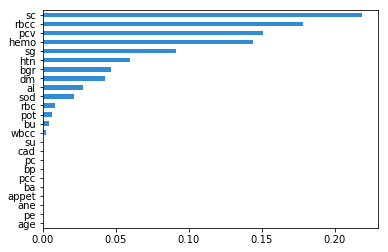

In [33]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

interpreter = Interpretation(np.array(test_df), feature_names=list(test_df.columns))
im_model = InMemoryModel(rf.predict_proba, examples=np.array(train_df), target_names=list(rf.classes_))
plots = interpreter.feature_importance.plot_feature_importance(im_model)

## Try to interpret and explain model prediction decisions

In [34]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

exp = LimeTabularExplainer(np.array(test_df), feature_names=test_df.columns, 
                           discretize_continuous=True, 
                           class_names=rf.classes_)

In [35]:
print(y_test[10])
exp.explain_instance(np.array(test_df)[10], rf.predict_proba).show_in_notebook()

ckd


In [36]:
print(y_test[30])
exp.explain_instance(np.array(test_df)[30], rf.predict_proba).show_in_notebook()

notckd


## View model decision boundary with some important features

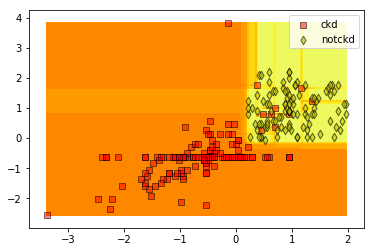

In [43]:
feature_indices = [i for i, feature in enumerate(list(train_df.columns)) 
                       if feature in ['hemo', 'rbcc']]
meu.plot_model_decision_surface(clf=rf, train_features=np.array(train_df)[:, feature_indices], 
                      train_labels=y_train, plot_step=0.01, cmap=plt.cm.Wistia_r,
                      markers=[',', 'd', '+'], alphas=[0.5, 0.6], colors=['r', 'y'])

# One-way partial dependence plots to understand the relationship of features on model's predictions

2018-05-08 10:27:01,156 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[35/35] grid cells ████████████████████ Time elapsed: 8 seconds

(0, 1)

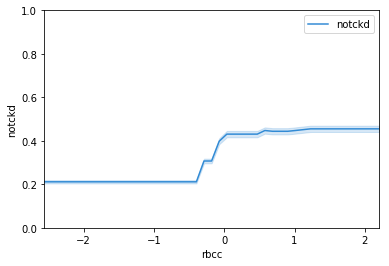

In [59]:
r = interpreter.partial_dependence.plot_partial_dependence(['rbcc'], im_model, grid_resolution=50, 
                                                       with_variance=True, figsize = (6, 4))
r[0][1].set_ylim(0, 1) 

2018-05-08 10:27:11,377 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[44/44] grid cells ████████████████████ Time elapsed: 9 seconds

(0, 1)

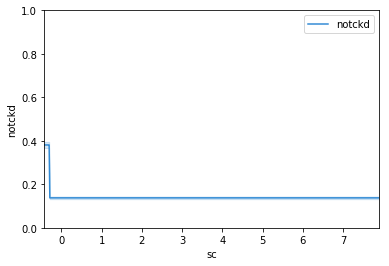

In [60]:
r = interpreter.partial_dependence.plot_partial_dependence(['sc'], im_model, grid_resolution=50, 
                                                       with_variance=True, figsize = (6, 4))
r[0][1].set_ylim(0, 1) 

2018-05-08 10:28:21,064 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[42/42] grid cells ████████████████████ Time elapsed: 10 seconds

(0, 1)

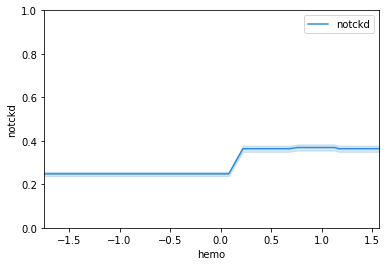

In [63]:
r = interpreter.partial_dependence.plot_partial_dependence(['hemo'], im_model, grid_resolution=50, 
                                                           with_variance=True, figsize = (6, 4))
r[0][1].set_ylim(0, 1) 

## Two-way partial dependence plots to check feature interactions for our model

2018-05-08 10:17:56,276 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[1540/1540] grid cells ████████████████████ Time elapsed: 168 seconds

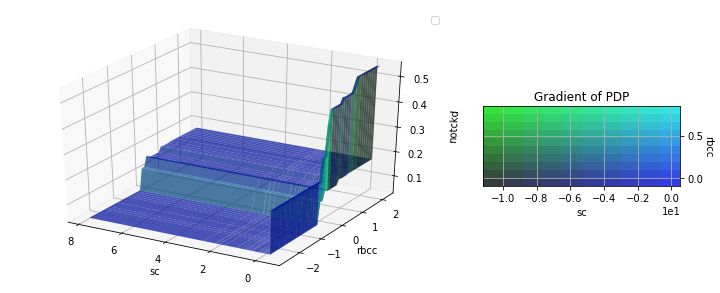

In [50]:
plots_list = interpreter.partial_dependence.plot_partial_dependence([('sc', 'rbcc')], 
                                                                    im_model, n_samples=1000, 
                                                                    figsize=(12, 5),
                                                                    grid_resolution=100)

2018-05-08 10:29:24,709 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[2485/2485] grid cells ████████████████████ Time elapsed: 273 seconds

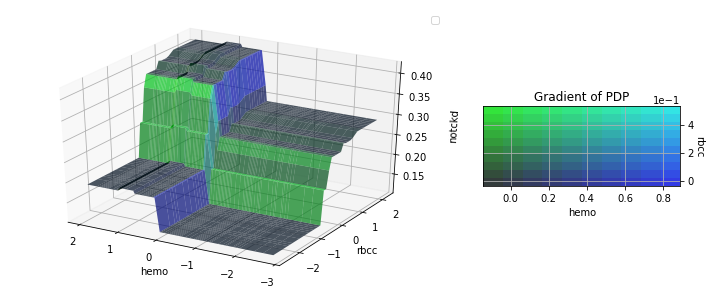

In [64]:
plots_list = interpreter.partial_dependence.plot_partial_dependence([('hemo', 'rbcc')], 
                                                                    im_model, n_samples=1000, 
                                                                    figsize=(12, 5),
                                                                    grid_resolution=100)